In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.0 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import torch

print("GPU available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")

GPU available: True
Device: Tesla P100-PCIE-16GB


In [ ]:
# small model for testing
model = YOLO("yolov8m.pt")

# the notebook was originally trained on Kaggle

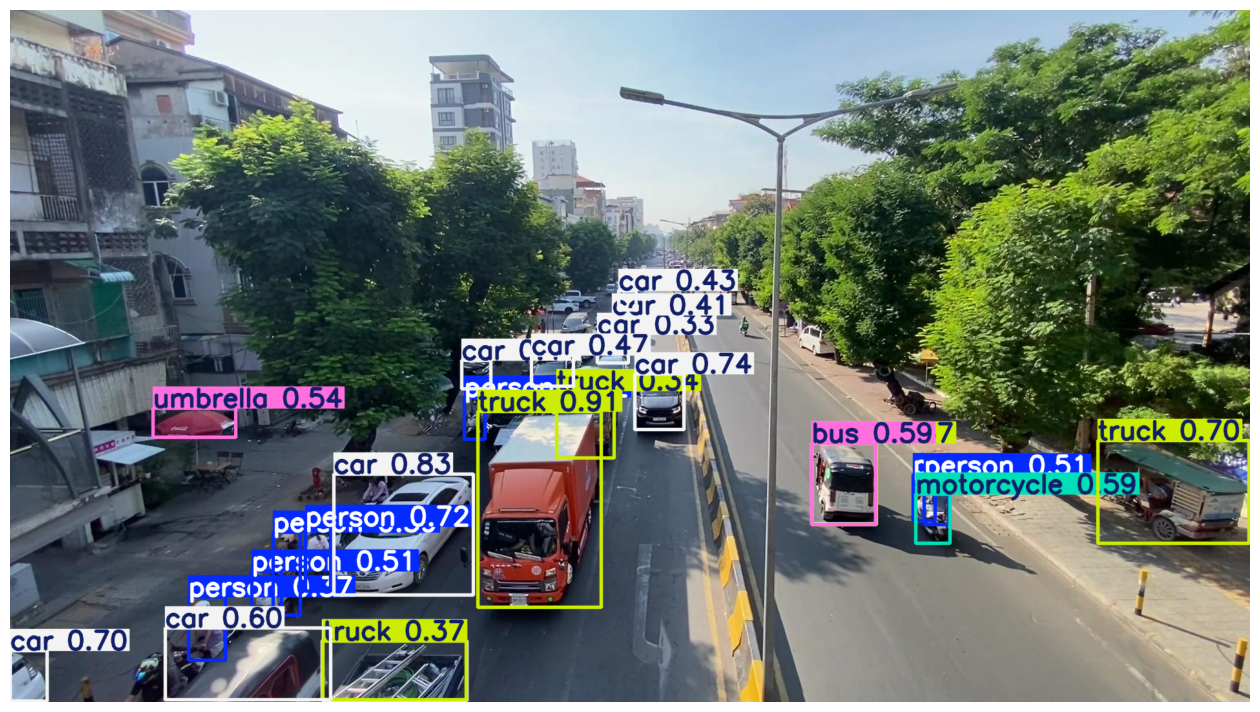

Class: 7, Conf: 0.91, Box: (724,622,915,925)
Class: 2, Conf: 0.83, Box: (501,719,717,906)
Class: 2, Conf: 0.74, Box: (967,564,1043,650)
Class: 0, Conf: 0.72, Box: (457,800,496,900)
Class: 7, Conf: 0.70, Box: (1684,667,1918,826)
Class: 2, Conf: 0.70, Box: (0,992,57,1070)
Class: 2, Conf: 0.60, Box: (240,957,496,1068)
Class: 0, Conf: 0.59, Box: (407,809,449,937)
Class: 3, Conf: 0.59, Box: (1402,750,1455,826)
Class: 5, Conf: 0.59, Box: (1241,671,1340,797)
Class: 25, Conf: 0.54, Box: (221,617,349,662)
Class: 2, Conf: 0.54, Box: (1241,671,1340,796)
Class: 0, Conf: 0.51, Box: (1415,721,1453,797)
Class: 0, Conf: 0.51, Box: (374,869,420,955)
Class: 2, Conf: 0.47, Box: (807,535,872,583)
Class: 2, Conf: 0.44, Box: (699,543,744,587)
Class: 2, Conf: 0.43, Box: (942,435,969,465)
Class: 2, Conf: 0.41, Box: (932,473,977,522)
Class: 0, Conf: 0.37, Box: (276,909,333,1007)
Class: 7, Conf: 0.37, Box: (484,977,706,1068)
Class: 7, Conf: 0.37, Box: (1241,671,1341,797)
Class: 2, Conf: 0.35, Box: (483,977,707,

In [ ]:
# Path
img_path = '/kaggle/input/traffic-recognition/dataset_ready/dataset_ready/images/train/1_0024_jpg.rf.2b42164270b2ce103f6f02a61448a200.jpg'

# Run prediction
results = model.predict(
    source=img_path,
    imgsz=640,   
    conf=0.30,
    verbose=False
)

# Plot the result
annotated_img = results[0].plot() 
annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,9))
plt.imshow(annotated_img)
plt.axis('off')
plt.show()

# Access bounding boxes and class info
for box in results[0].boxes:
    cls = int(box.cls[0])      
    conf = float(box.conf[0]) 
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    print(f"Class: {cls}, Conf: {conf:.2f}, Box: ({x1},{y1},{x2},{y2})")


In [6]:
%%writefile data.yaml
path: /kaggle/input/traffic-recognition/dataset_ready/dataset_ready
train: images/train
val: images/val

nc: 5
names:
  - Bus
  - Car
  - Motocycle
  - Rickshaw
  - Truck

Writing data.yaml


In [ ]:
# train on GPU
model.train(
    data="data.yaml", 
    epochs=50,
    batch=32,
    imgsz=640,       
    device="cuda",     
    workers=4,          
    augment=True,      
    save=True,          
    project="runs/train", 
    name="traffic_model", 
    exist_ok=True 
)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=traffic_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c201d55eb10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [8]:
best_model_path = "runs/train/traffic_model/weights/best.pt"
final_model_path = "runs/train/traffic_model/weights/last.pt"

print(f"Best checkpoint saved at: {best_model_path}")
print(f"Final model saved at: {final_model_path}")

Best checkpoint saved at: runs/train/traffic_model/weights/best.pt
Final model saved at: runs/train/traffic_model/weights/last.pt


In [9]:
metrics = model.val(data="data.yaml")
print(metrics)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 93 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 522.0±56.8 MB/s, size: 299.9 KB)
val: Scanning /kaggle/input/traffic-recognition/dataset_ready/dataset_ready/labels/val... 489 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 489/489 515.7it/s 0.9s
WARNING ⚠️ val: Cache directory /kaggle/input/traffic-recognition/dataset_ready/dataset_ready/labels is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 31/31 3.1it/s 10.0s
                   all        489      18576      0.503      0.485      0.467       0.31
                   Bus          1          1          0          0          0          0
                   Car        489      11199        0.8      0.717      0.775      0.524
             Motocycle        489       476

Saved annotated image to: /kaggle/working/annotated_img.jpg


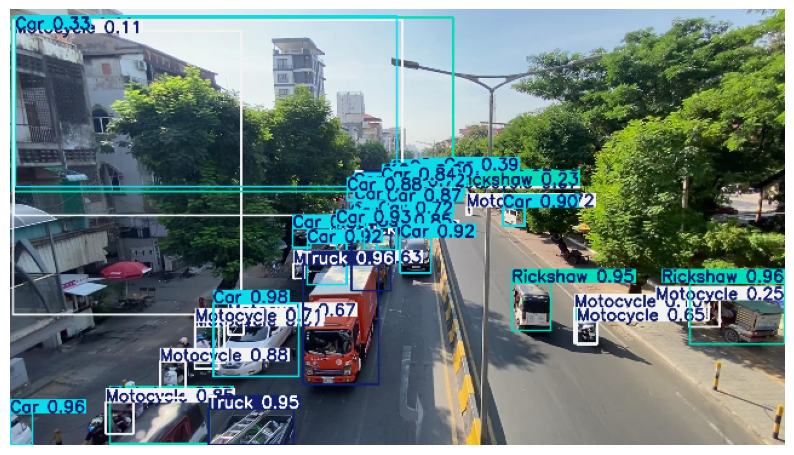

Class: 1, Conf: 0.98, Box: (503,723,715,903)
Class: 3, Conf: 0.96, Box: (1684,672,1918,823)
Class: 4, Conf: 0.96, Box: (725,627,913,922)
Class: 1, Conf: 0.96, Box: (0,993,55,1070)
Class: 4, Conf: 0.95, Box: (491,982,703,1070)
Class: 3, Conf: 0.95, Box: (1243,672,1339,790)
Class: 1, Conf: 0.93, Box: (808,526,877,602)
Class: 1, Conf: 0.92, Box: (736,574,834,677)
Class: 1, Conf: 0.92, Box: (966,561,1042,648)
Class: 1, Conf: 0.90, Box: (1221,488,1275,533)
Class: 1, Conf: 0.89, Box: (700,538,745,586)
Class: 2, Conf: 0.88, Box: (371,866,434,955)
Class: 1, Conf: 0.88, Box: (835,446,880,470)
Class: 1, Conf: 0.87, Box: (933,473,975,520)
Class: 1, Conf: 0.85, Box: (909,535,956,591)
Class: 2, Conf: 0.85, Box: (237,966,305,1044)
Class: 1, Conf: 0.84, Box: (920,421,939,441)
Class: 4, Conf: 0.84, Box: (845,554,943,692)
Class: 1, Conf: 0.72, Box: (942,436,967,463)
Class: 2, Conf: 0.72, Box: (1130,486,1142,506)
Class: 1, Conf: 0.72, Box: (912,504,957,538)
Class: 2, Conf: 0.71, Box: (458,768,531,870)
C

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load the trained model
model = YOLO("/kaggle/working/runs/detect/runs/train/traffic_model/weights/best.pt")

# Image path
img_path = '/kaggle/input/traffic-recognition/dataset_ready/dataset_ready/images/train/1_0024_jpg.rf.2b42164270b2ce103f6f02a61448a200.jpg'

# Run prediction
results = model.predict(
    source=img_path,
    imgsz=640,
    conf=0.05,
    verbose=False
)

# Plot annotated image
annotated_img = results[0].plot()
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Save image instead of showing
output_path = "/kaggle/working/annotated_img.jpg"
cv2.imwrite(output_path, annotated_img)
print(f"Saved annotated image to: {output_path}")

# Display a smaller version in notebook
plt.figure(figsize=(10,6))
plt.imshow(cv2.resize(annotated_img_rgb, (640, 360)))
plt.axis('off')
plt.show()

# Print bounding boxes and class info
if results[0].boxes:
    for box in results[0].boxes:
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        print(f"Class: {cls}, Conf: {conf:.2f}, Box: ({x1},{y1},{x2},{y2})")
else:
    print("No detections above confidence threshold.")
